# Notebook Dedicated to Explore Real Data

The Data used correspond to (scintillator phase?) a period of recording from April 2022 until January 2023

In [1]:
import numpy as np
import uproot

import matplotlib.pyplot as plt
import seaborn as sn

import pandas as pd

import analysis_antinu

# 1 - Extract and Import Data

construct_data = True #Turn True if we want to create a new dataset

if construct_data:
    analysis_antinu

data = pd.read_csv('data/full_data.csv').drop(columns='Unnamed: 0')
data

en_inf_cut = 0
en_up_cut = 10

condition_energy = (data['energy'] > en_inf_cut) & (data['energy'] <= en_up_cut)

energy = np.array(data[condition_energy]['energy'])
energy

# 2 - Observe the Energy of All Data

sn.histplot(energy, bins = 80)
plt.yscale('log')

We need more statistics!

# 3 - Full Real data

## 3.1 - Extract and cut data

In [4]:
#read file
#file = pd.read_csv('C:/snoplus simulations/real_data_antinu/real_data_filtered.csv')
file = pd.read_csv('C:/snoplus simulations/real_data_antinu/bronze_data/Bronze_data_Analysis20.csv')
file

,Unnamed: 0,fitValid,scintFit,runID,dcFlag,evIndex,evID,triggerWord,Nhits,NhitsClean,...,posz,posr,posFOM,posFOM2,time_clock50 (mcs),ITR,beta14,alphabeta212,alphabeta214,NHits
0,0.0,True,True,307661,951627314298878,0,9099475,1048577,66.0,59,...,-1331.167236,5731.488681,800.701782,59,1.432702e+11,0.305085,0.136984,-99999.0,-99999.0,NaN
1,1.0,True,True,307661,951627314298878,0,9099480,68157441,75.0,70,...,3321.097656,5832.544029,960.558411,70,1.432702e+11,0.214286,0.014681,-99999.0,-99999.0,NaN
2,2.0,True,True,307661,951627314298878,0,9099486,1048593,56.0,48,...,-239.081100,5722.460849,681.968994,48,1.432702e+11,0.354167,0.179642,-99999.0,-99999.0,NaN
3,3.0,True,True,307661,951627314298878,0,9099488,1048603,125.0,113,...,-1767.157959,5931.162156,1572.397949,113,1.432702e+11,0.318584,0.162851,-99999.0,-99999.0,NaN
4,4.0,True,True,307661,951627314298878,0,9099490,1048577,41.0,38,...,3698.150879,3750.010186,429.658875,38,1.432702e+11,0.157895,0.371640,-99999.0,-99999.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317803,130328.0,True,True,302896,951627314298878,0,9495632,68157459,101.0,95,...,4758.247070,6128.395650,1303.463745,95,5.587799e+10,0.252632,0.100641,-99999.0,-99999.0,NaN
14317804,130329.0,True,True,302896,951627314298871,0,9495635,1048577,36.0,30,...,1719.044678,4803.099206,419.945557,30,5.587799e+10,0.233333,-0.002518,-99999.0,-99999.0,NaN
14317805,130330.0,True,True,302896,951627314294782,0,9495645,68157441,38.0,37,...,115.009796,3578.380809,496.289795,37,5.587799e+10,0.243243,0.102068,-99999.0,-99999.0,NaN
14317806,130331.0,True,True,302896,951627314298878,0,9495648,1048577,40.0,36,...,-325.478424,5756.020145,483.299988,36,5.587799e+10,0.222222,-0.019751,-99999.0,-99999.0,NaN


In [5]:
file.columns

Index(['Unnamed: 0', 'fitValid', 'scintFit', 'runID', 'dcFlag', 'evIndex',
       'evID', 'triggerWord', 'Nhits', 'NhitsClean', 'correctedNhits',
       'neckNhits', 'energy', 'posx', 'posy', 'posz', 'posr', 'posFOM',
       'posFOM2', 'time_clock50 (mcs)', 'ITR', 'beta14', 'alphabeta212',
       'alphabeta214', 'NHits'],
      dtype='object')

In [7]:
#cuts:
en_cut_inf = 0.5  #To avoid accidentals and retriggers
en_cut_sup = 8
pos_r_cut = 5500
condition_cut = (file['energy'] > en_cut_inf) & (file['energy'] <= en_cut_sup) & (file['posr'] <= pos_r_cut)
file_cut = file[condition_cut].reset_index()

#Extract Observables
energy = file_cut['energy'].to_numpy()
posx = file_cut['posx'].to_numpy()
posy = file_cut['posy'].to_numpy()
posz = file_cut['posz'].to_numpy() - 184.4
time_clock = file_cut['time_clock50 (mcs)'].to_numpy()

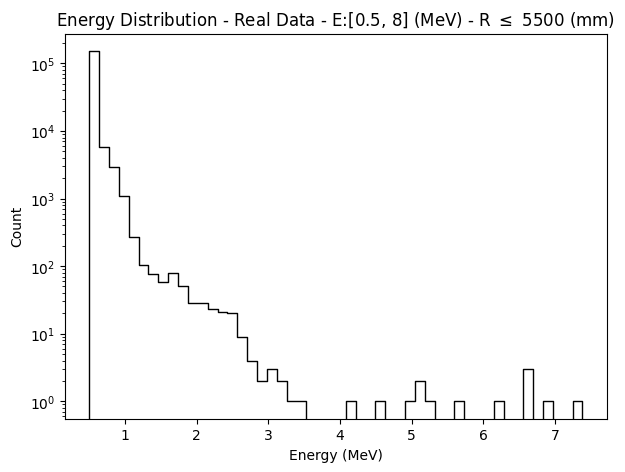

In [8]:
plt.figure(figsize=(7,5))
sn.histplot(energy, bins = 50, color = 'black', element = 'step', alpha = 0)
plt.xlabel('Energy (MeV)')
plt.title(rf'Energy Distribution - Real Data - E:[{en_cut_inf}, {en_cut_sup}] (MeV) - R $\leq$ {pos_r_cut} (mm)')

plt.yscale('log')

## 3.2 - Event Selection

### 3.2.1 - Select events based on $\alpha\tau$, $\Delta$r and limits on promt and delayed energies

#Data to save
delta_t = []
delta_r = []

energy_prompt = []
energy_delay = []

N_evt = energy.shape[0]

for ev_i in range(N_evt):
    #initiate with an arbitrary value for dt
    dt = 0 
    # Suspected prompt observables
    t1 = time_clock[ev_i]
    posx1 = posx_ev[ev_i]
    posy1 = posy_ev[ev_i]
    posz1 = posz_ev[ev_i]

    delay_index = ev_i + 1
    while dt < alpha*tau:
        
        #suspected delay
        try:
            t2 = time_clock[delay_index]
            posx2 = posx_ev[delay_index]
            posy2 = posy_ev[delay_index]
            posz2 = posz_ev[delay_index]
            
        except IndexError:
            break
            
        #evaluate dt
        dt = t2 - t1
        #print(dt)

        

        #condition to be a reactor nu candidate
        if dt >= tau - low_tau and dt <= tau - up_tau:
            print('Found a pair of prompt and delayed!')
            delta_t.append(dt)

            #Compute dr
            dx = posx2 - posx1
            dy = posy2 - posy1
            dz = posz2 - posz1
            dr = np.sqrt(dx**2 + dy**2 + dz**2)
            delta_r.append(dr)

            energy_prompt.append(energy[ev_i])
            energy_delay.append(energy[delay_index])

            #out of the while
            break
            
        #evolve the index of the suspected delay

        delay_index += 1

delta_t = np.array(delta_t)
delta_r = np.array(delta_r)

energy_prompt = np.array(energy_prompt)
energy_delay = np.array(energy_delay)

In [9]:
# Values selected by looking at the delta_t and delta_r distribution of MC reactor nu data and the fit of the curves
alpha = 8 
#Expected values
tau = 251
dr_exp = 357
dr_unc = 200 #choose a large interval otherwise we are rejecting a lot of events!

dr_sup_lim = 1000 #choose a large interval otherwise we are rejecting a lot of events!
dr_inf_lim = 0

#Energy cut on delayed events
energy_delay_inf_cut = 1.8
energy_delay_sup_cut = 3

'''
The algorithm will work as follow:
(1) take an event with time_clock[i] and pos[i];
(2) evaluate the difference between events dr = dr[i+1] - dr[i]
(3) if dr lies in dr_exp +/- dr_unc or dr_exp lies in interval [dr_sup_lim, dr_inf_lim] -> save event observables 

This logic must be applied along all the events and within a while loop until a size dt = (alpha)(tau) is reached.
The code will use a candidate prompt and then find a delay candidate.
'''

#Data to save
delta_t = []
delta_r = []

energy_prompt = []
energy_delay = []

N_ev = energy.shape[0]

for ev_i in range(N_ev):

    delay_index = ev_i + 1
    #print('In event', ev_i)

    #Suspected promt event observables
    t1 = time_clock[ev_i]
    posx1 = posx[ev_i]
    posy1 = posy[ev_i]
    posz1 = posz[ev_i]
    energy_1 = energy[ev_i]
    
    try:
        #Suspected delayed
        t2 = time_clock[delay_index]
        posx2 = posx[delay_index]
        posy2 = posy[delay_index]
        posz2 = posz[delay_index]
        energy_2 = energy[delay_index]
        
        #Evaluate the dr and dt between events
        dx = posx2 - posx1
        dy = posy2 - posy1
        dz = posz2 - posz1
        dr = np.sqrt(dx**2 + dy**2 + dz**2)
        dt = t2 - t1
        
    except IndexError:
        continue
       
    #Start looking for a delay event within a windows alpha times tau
    while (dt > 0) and (dt <= alpha*tau):

        # If the dr coincide with the expected values, then save the observables of interest and break the while
        #if (dr >= dr_exp - dr_unc) and (dr <= dr_exp + dr_unc) and (dt > 0) and (dt <= alpha*tau) and (energy_2 >= energy_delay_inf_cut) and (energy_2 <= energy_delay_sup_cut):
        if (dr >= dr_inf_lim) and (dr <= dr_sup_lim) and (dt > 0) and (dt <= alpha*tau) and (energy_2 >= energy_delay_inf_cut) and (energy_2 <= energy_delay_sup_cut):
            print('Pair Found')
            print(dr)
            delta_t.append(dt)
            delta_r.append(dr)
            energy_prompt.append(energy_1)
            energy_delay.append(energy_2)

            break
        # Evolve the delay index if the condition is not fulfilled
        delay_index += 1

        # Look for the next Suspected delayed
        try:
            t2 = time_clock[delay_index]
            posx2 = posx[delay_index]
            posy2 = posy[delay_index]
            posz2 = posz[delay_index]
            energy_2 = energy[delay_index]
    
            #Evaluate the dr and dt between events
            dx = posx2 - posx1
            dy = posy2 - posy1
            dz = posz2 - posz1
            dr = np.sqrt(dx**2 + dy**2 + dz**2)
            dt = t2 - t1
        except IndexError:
            break

energy_prompt = np.array(energy_prompt)
energy_delay = np.array(energy_delay)
delta_t = np.array(delta_t)
delta_r = np.array(delta_r)

Pair Found
870.3758220674193
Pair Found
566.2742571198868
Pair Found
365.3656311017482


## 3.3 - Plots of Selected Observables

Text(0.5, 1.0, 'Energy Spectrum - Windows $\\Delta$t:8$\\tau$ ($\\mu$s) and $\\Delta$r: [0, 1000] (mm)')

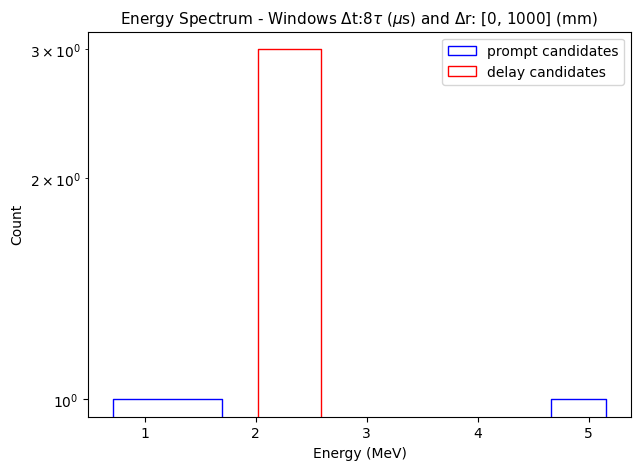

In [24]:
plt.figure(figsize = (7,5))
sn.histplot(energy_prompt, binwidth=0.5 , color = 'b', element = 'step', alpha = 0, label = 'prompt candidates')
sn.histplot(energy_delay, binwidth=0.5, color = 'r', element = 'step', alpha = 0, label = 'delay candidates')
plt.legend(loc = 'best')

plt.xlabel('Energy (MeV)')

plt.yscale('log')

plt.title(rf'Energy Spectrum - Windows $\Delta$t:{alpha}$\tau$ ($\mu$s) and $\Delta$r: [{dr_inf_lim}, {dr_sup_lim}] (mm)', fontsize = 11)

In [25]:
energy_delay

array([2.58561394, 2.08478373, 2.02367198])

Text(0.5, 1.0, '$\\Delta$t Distribution - Pair Windows of $\\Delta$t:8$\\tau$ ($\\mu$s) and $\\Delta$r: [0, 1000] (mm)')

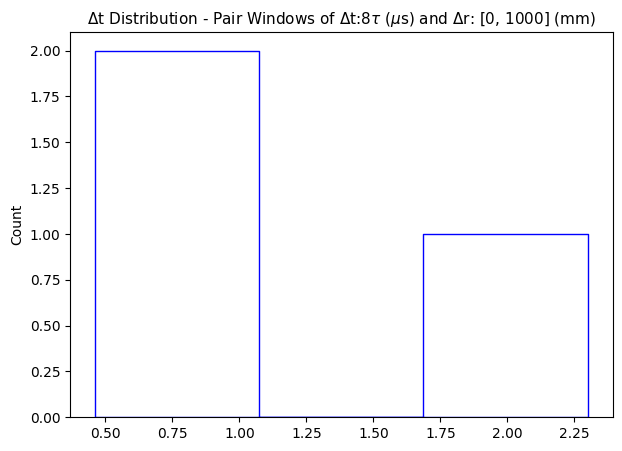

In [22]:
plt.figure(figsize = (7,5))

sn.histplot(delta_t, binwidth = 0.5, color = 'b', element = 'step', alpha = 0)

plt.title(rf'$\Delta$t Distribution - Pair Windows of $\Delta$t:{alpha}$\tau$ ($\mu$s) and $\Delta$r: [{dr_inf_lim}, {dr_sup_lim}] (mm)', fontsize = 11)

<Axes: ylabel='Count'>

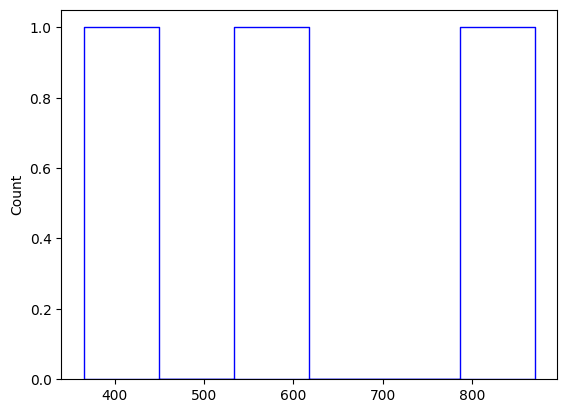

In [30]:
sn.histplot(delta_r, binwidth = 80, color = 'b', element = 'step', alpha = 0)